In [42]:
# Importing the dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot



In [68]:
# Inerting the dataset
df = pd.read_csv('Dataset 5.csv')
df.sample(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
807,808,0,3,"Pettersson, Miss. Ellen Natalia",female,18.0,0,0,347087,7.7750,NaN,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S


In [43]:
# ==================Preprocessing====================
# filling the null values in the age section
AgeMean = df['Age'].mean()
df['Age'].fillna(AgeMean, inplace=True)
df['Age']= df['Age'].astype(int)
df['Age'].head(20)

0     22
1     38
2     26
3     35
4     35
5     29
6     54
7      2
8     27
9     14
10     4
11    58
12    20
13    39
14    14
15    55
16     2
17    29
18    31
19    29
Name: Age, dtype: int32

In [44]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [45]:
# cleaning the alphanumeric values in the Ticket column

def keep_numeric(ticket):
    return ''.join(char for char in str(ticket) if char.isdigit())

df['Ticket'] = df['Ticket'].apply(keep_numeric)
print(df['Ticket'].head(20))

0       521171
1        17599
2     23101282
3       113803
4       373450
5       330877
6        17463
7       349909
8       347742
9       237736
10        9549
11      113783
12       52151
13      347082
14      350406
15      248706
16      382652
17      244373
18      345763
19        2649
Name: Ticket, dtype: object


In [28]:
# Droping the cabin attribute
df.drop('Cabin', axis=1, inplace=True)
df.head(20)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,521171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,23101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C


In [29]:
# Now classification Training and Testing 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Preprocessing: Drop unnecessary columns and handle missing values
# (You may need to perform more extensive preprocessing based on your dataset)
df.drop(['Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})  # Convert gender to numeric

# Fill missing values in the 'Age' column (you may want to use a more sophisticated approach)
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Separate features (X) and target variable (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)



Accuracy: 0.77

Confusion Matrix:
[[90 15]
 [26 48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.81       105
           1       0.76      0.65      0.70        74

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.77      0.77       179



In [ ]:

# Trying with different Algorithms
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = {
    'PassengerId': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1],
    'Pclass': [3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3],
    'Name': ['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath',
             'Allen, Mr. William Henry', 'Moran, Mr. James', 'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
             'Johnson, Mrs. Oscar W', 'Nasser, Mrs. Nicholas', 'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
             'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan', 'Vestrom, Miss. Hulda Amanda Adolfina',
             'Hewlett, Mrs. Mary D Kingcome', 'Rice, Master. Eugene', 'Williams, Mr. Charles Eugene',
             'Vander Planke, Mrs. Julius', 'Masselmani, Mrs. Fatima'],
    'Gender': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female',
               'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'female'],
    'Age': [22, 38, 26, 35, 35, 29, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, 2, 29, 31, 29],
    'SibSp': [1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, 0],
    'Parch': [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0],
    'Ticket': [521171, 17599, 23101282, 113803, 373450, 330877, 17463, 349909, 347742, 237736,
               9549, 113783, 52151, 347082, 350406, 248706, 382652, 244373, 345763, 2649],
    'Fare': [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708,
             16.7, 26.55, 8.05, 31.275, 7.8542, 16, 29.125, 13, 18, 7.225],
    'Embarked': ['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'C']
}

# df = pd.DataFrame(data)

# Convert categorical variables to numerical
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Split the data into features and target variable
X = df[['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Support Vector Machine Accuracy:", svm_accuracy)


In [61]:
df = pd.read_csv('Dataset 5.csv')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

age_mean = df['Age'].mean()
df['Age'].fillna(age_mean, inplace = True)

df['Gender'] = df['Gender'].map({'female':0,'male':1})
# df['Embarked'] = df['Embarked'].map({'S'or's':0,'C'or'c':1,'Q'or'q':2})

# X = df[['Pclass','Gender','Age','SibSp','Parch','Fare','Embarked']]
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
print(f'DecisionTreeClassifier :{accuracy_score(y_test, dt_y_pred)}')

#Random Forest Classifer
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print(f"RandomForestClassifer :{accuracy_score(y_test, rf_y_pred)}")

#SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_y_pred= svm_model.predict(X_test)
print(f"Support vector machine :{accuracy_score(y_test, svm_y_pred)}")



DecisionTreeClassifier :0.7318435754189944
RandomForestClassifer :0.8044692737430168
Support vector machine :0.5977653631284916


In [ ]:
# Visualization 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Sample Data
data = {
    'PassengerId': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1],
    'Pclass': [3, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 1, 3, 3, 3, 2, 3, 2, 3, 3],
    'Name': ['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath',
             'Allen, Mr. William Henry', 'Moran, Mr. James', 'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
             'Johnson, Mrs. Oscar W', 'Nasser, Mrs. Nicholas', 'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
             'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan', 'Vestrom, Miss. Hulda Amanda', 'Hewlett, Mrs.',
             'Rice, Master. Eugene', 'Williams, Mr. Charles Eugene', 'Vander Planke, Mrs. Julius', 'Masselmani, Mrs. Fatima'],
    'Gender': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female',
               'male', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'female'],
    'Age': [22, 38, 26, 35, 35, 29, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, 2, 29, 31, 29],
    'SibSp': [1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 4, 0, 1, 0],
    'Parch': [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 5, 0, 0, 1, 0, 0, 0],
    'Ticket': [521171, 17599, 23101282, 113803, 373450, 330877, 17463, 349909, 347742, 237736, 9549, 113783,
               52151, 347082, 350406, 248706, 382652, 244373, 345763, 2649],
    'Fare': [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708, 16.7, 26.55, 8.05, 31.275,
             7.8542, 16, 29.125, 13, 18, 7.225],
    'Embarked': ['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'C']
}

df = pd.DataFrame(data)

# Visualization 1: Countplot of Survived
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df)
plt.title('Count of Survived (0: No, 1: Yes)')
plt.show()

# Visualization 2: Countplot of Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Count of Passengers by Gender')
plt.show()

# Visualization 3: Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.show()

# Visualization 4: Boxplot of Fare by Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# Visualization 5: Scatterplot of Age vs. Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived', palette='viridis')
plt.title('Scatterplot of Age vs. Fare (Survived: 0-No, 1-Yes)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Visualization 6: Pie chart of Embarked
plt.figure(figsize=(8, 8))
df['Embarked'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Embarked Ports')
plt.show()

# Visualization 7: Interactive Bar Chart using Plotly Express
fig = px.bar(df, x='Pclass', y='Fare', color='Survived', barmode='group', labels={'Survived': 'Survived (0-No, 1-Yes)'})
fig.update_layout(title='Bar Chart of Fare by Pclass and Survival', xaxis_title='Pclass', yaxis_title='Fare')
fig.show()


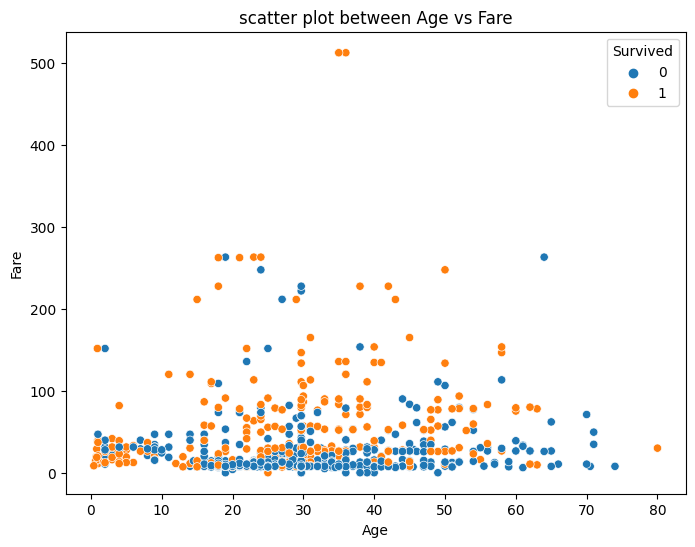

In [66]:
# importing the dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# df = pd.read_csv('Dataset 5.csv')

# ploting the CoutPlot
# plt.figure(figsize=(8, 6))
# sns.countplot(x='Survived', data=df)
# plt.title("Countplot of survived (0 for No, 1 for yes)")
# plt.show()

# ploting the histogram
# plt.figure(figsize=(8,6))
# sns.histplot(df['Age'], bins=20, kde=True)
# plt.title("Histogram of Age")
# plt.show()

# ploting the barchart
# plt.figure(figsize=(8,6))
# sns.boxplot(x='Pclass', y='Fare', data=df)
# plt.title('Data Distribution Between Pclass and Fare')
# plt.xlabel('Pclass')
# plt.ylabel('Fare')
# plt.show()

# ploting the scatter plot
# plt.figure(figsize=(8,6))
# sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived')
# plt.title("scatter plot between Age vs Fare")
# plt.xlabel('Age')
# plt.ylabel('Fare')
# plt.show()

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Sample Data
# (Assuming df is the DataFrame with the Titanic dataset)

# Drop non-numeric columns for simplicity in this example
X = df.drop(['PassengerId', 'Name', 'Fare', 'Gender', 'Ticket','Cabin', 'Embarked'], axis=1)
y = df['Fare']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear_reg = linear_reg.predict(X_test)

# Decision Tree Regressor
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, y_train)
y_pred_dt_reg = decision_tree_reg.predict(X_test)

# Random Forest Regressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)
y_pred_rf_reg = random_forest_reg.predict(X_test)

# Evaluation and Printing Results

# Linear Regression Results
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear_reg))
print("R-squared:", r2_score(y_test, y_pred_linear_reg))

# Decision Tree Regressor Results
print("\nDecision Tree Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt_reg))
print("R-squared:", r2_score(y_test, y_pred_dt_reg))

# Random Forest Regressor Results
print("\nRandom Forest Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf_reg))
print("R-squared:", r2_score(y_test, y_pred_rf_reg))


Linear Regression:
Mean Squared Error: 946.3335798986899
R-squared: 0.38844806379852126

Decision Tree Regressor:
Mean Squared Error: 1365.465347336835
R-squared: 0.11759130742326285

Random Forest Regressor:
Mean Squared Error: 1473.6651068840968
R-squared: 0.04766905817290201


In [81]:
# Now doing the Training and testing with the regressinon

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Dataset 5.csv')

agemean = df['Age'].mean()
df['Age'].fillna(agemean, inplace=True)

X = df.drop(['PassengerId', 'Name', 'Fare', 'Gender', 'Ticket', 'Cabin', 'Embarked'], axis=1)
y = df['Fare']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train and split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Decision Tree Regressor
dt_reg_model = DecisionTreeRegressor(random_state=42)
dt_reg_model.fit(X_train, y_train)
dt_reg_pred = dt_reg_model.predict(X_test)
print("\nDecision Tree Regressor")
print("DecisionTreeRegressor : MSE :", mean_squared_error(y_test, dt_reg_pred))
print("DecisionTreeRegressor : RMSE :", mean_squared_error(y_test, dt_reg_pred) ** 0.5)
print("DecisionTreeRegressor : R^2 Score:", r2_score(y_test, dt_reg_pred))

# Random Forest Regressor
rf_reg_model = RandomForestRegressor(random_state=42)
rf_reg_model.fit(X_train, y_train)
rf_reg_pred = rf_reg_model.predict(X_test)
print("\nRandom Forest Regressor")
print("Random Forest Regressor : MSE", mean_squared_error(y_test, rf_reg_pred))
print("Random Forest Regressor : RMSE", mean_squared_error(y_test, rf_reg_pred) ** 0.5)
print("Random Forest Regressor : R^2 Score:", r2_score(y_test, rf_reg_pred))

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("\nLinear Regression")
print("Linear Regression : MSE", mean_squared_error(y_test, lr_pred))
print("Linear Regression : RMSE", mean_squared_error(y_test, lr_pred) ** 0.5)
print("Linear Regression : R^2 Score:", r2_score(y_test, lr_pred))

# Support vector Regressor
svc_reg_model = SVR()
svc_reg_model.fit(X_train, y_train)
svc_reg_pred = svc_reg_model.predict(X_test)
print("\nSupport Vector Regressor")
print("Support Vector Regressor : MSE", mean_squared_error(y_test, svc_reg_pred))
print("Support Vector Regressor : RMSE", mean_squared_error(y_test, svc_reg_pred) ** 0.5)
print("Support Vector Regressor : R^2 Score:", r2_score(y_test, svc_reg_pred))





Decision Tree Regressor
DecisionTreeRegressor : MSE : 1553.7588587645798
DecisionTreeRegressor : RMSE : 39.417748017416976
DecisionTreeRegressor : R^2 Score: -0.004090162973402256

Random Forest Regressor
Random Forest Regressor : MSE 1479.4245348470442
Random Forest Regressor : RMSE 38.46328814398275
Random Forest Regressor : R^2 Score: 0.043947126079431964

Linear Regression
Linear Regression : MSE 946.333579898691
Linear Regression : RMSE 30.762535329499276
Linear Regression : R^2 Score: 0.3884480637985205

Support Vector Regressor
Support Vector Regressor : MSE 1113.9384229655002
Support Vector Regressor : RMSE 33.375716066707845
Support Vector Regressor : R^2 Score: 0.2801362924829288
